In [ ]:
import numpy as np
import scipy.ndimage
from skimage.io import imread, imsave

red = [255, 0, 0]


def add_detail_on_image(image, folder, filename, detail_center, half_x, half_y, zoom, top_start_x, top_start_y):
    x = detail_center[1]
    y = detail_center[0]
    detail = image[y - half_y:y + half_y + 1, x - half_x:x + half_x + 1]
    magnified = scipy.ndimage.zoom(detail, zoom, order=0)
    image[top_start_y:top_start_y + len(magnified), top_start_x:top_start_x + len(magnified[0])] = magnified
    imsave(f'{folder}/converted/{filename}', image)


import os

folder = 'C:/Users/marti/OneDrive - FH JOANNEUM/5. Semester/BAC-2/Versionen/99_Develop/BAC-2/res/reference'
detail_center = [2500, 5000]

for filename in os.listdir(folder):
    if filename.__contains__('.png'):
        image = imread(f'{folder}/{filename}')
        add_detail_on_image(image, folder, filename, detail_center, 300, 400, 2, 100, 100)

In [18]:
import numpy as np
import scipy.ndimage
from skimage.io import imread, imsave
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

red = [255, 0, 0]


def plot_detail_on_image(fig, folder, filename, detail_center, half_x, half_y, zoom, top_start_x, top_start_y):
    canvas = FigureCanvas(fig)
    canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    x = detail_center[1]
    y = detail_center[0]
    detail = image[y - half_y:y + half_y + 1, x - half_x:x + half_x + 1]
    magnified = scipy.ndimage.zoom(detail, zoom, order=0)
    image[top_start_y:top_start_y + len(magnified), top_start_x:top_start_x + len(magnified[0])] = magnified
    imsave(f'{folder}/converted/{filename}', image)

IndexError: list index out of range

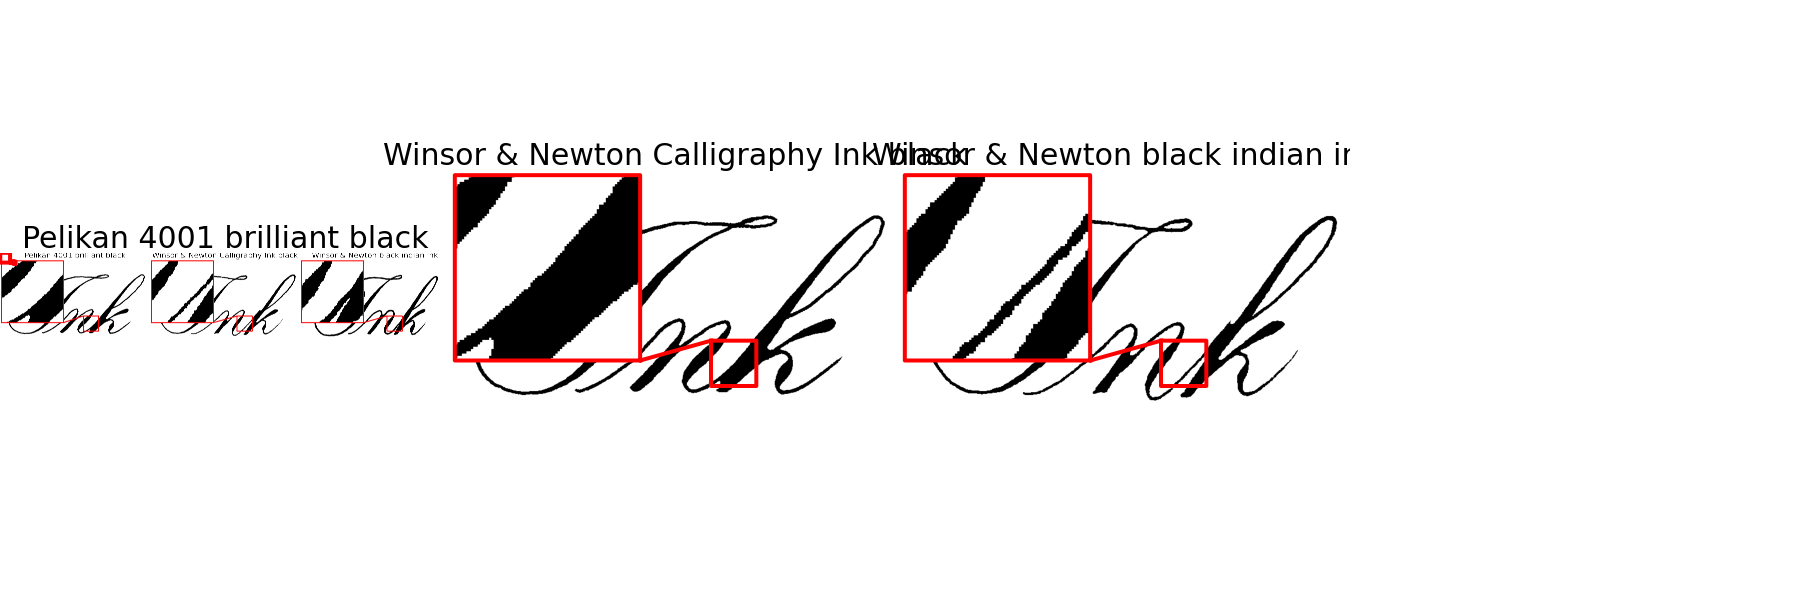

In [2]:
from skimage.io import imsave
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

plt.rcParams['savefig.pad_inches'] = 0
plt.rcParams["savefig.bbox"] = 'Tight'
plt.rcParams['figure.figsize'] = (25, 25/3)
plt.rcParams['figure.subplot.bottom'] = 0
plt.rcParams['figure.subplot.hspace'] = 0
plt.rcParams['figure.subplot.left'] = 0
plt.rcParams['figure.subplot.right'] = 1
plt.rcParams['figure.subplot.top'] = 1
plt.rcParams['figure.subplot.wspace'] = 0

# Hide axes
def hide_or_show_axes(show_axes):
    rc = {"axes.spines.left": show_axes,
          "axes.spines.right": show_axes,
          "axes.spines.bottom": show_axes,
          "axes.spines.top": show_axes,
          "xtick.bottom": show_axes,
          "xtick.labelbottom": show_axes,
          "ytick.labelleft": show_axes,
          "ytick.left": show_axes}
    plt.rcParams.update(rc)


hide_or_show_axes(False)


zoom_factor = 8

def zoom_img(image):
    if len(np.shape(image)) == 2:
        return zoom(image, zoom_factor, order=0)
    else:
        return zoom(image, (zoom_factor, zoom_factor, 1), order=0)


def save_img(image, name, zoom=True):
    imsave(f'{folder}/improved/{name}.png', zoom_img(image) if zoom else image)


def save_plt_svg(name):
    plt.savefig(f'{folder}/improved/{name}.svg')


def add_frame(image, x, y, half_y, half_x, top_start_x, top_start_y, detail_width, detail_height, ax, change_corners=False):

    if change_corners:
        frame = np.array([
            [top_start_x - 2, top_start_y + detail_width + 1],
            [top_start_x - 2, top_start_y - 2],
            [top_start_x + detail_height + 1, top_start_y - 2],
            [top_start_x + detail_height + 1, top_start_y + detail_width + 1],
            [top_start_x - 2, top_start_y + detail_width + 1],
            [x + half_y, y - half_x],
            [x + half_y, y + half_x],
            [x - half_y, y + half_x],
            [x - half_y, y - half_x],
            [x + half_y, y - half_x]
        ])
    else:
        frame = np.array([
            [top_start_x + detail_height + 1, top_start_y + detail_width + 1],
            [top_start_x - 2, top_start_y + detail_width + 1],
            [top_start_x - 2, top_start_y - 2],
            [top_start_x + detail_height + 1, top_start_y - 2],
            [top_start_x + detail_height + 1, top_start_y + detail_width + 1],
            [x - half_y, y - half_x],
            [x + half_y, y - half_x],
            [x + half_y, y + half_x],
            [x - half_y, y + half_x],
            [x - half_y, y - half_x]
        ])

    ax.imshow(image)
    ax.plot(frame[:, 0], frame[:, 1], color='r', linewidth=4)


def add_detail_to_image(image, detail_center, half_x, half_y, zoom, top_start_x, top_start_y, change_corners=False):
    x = int(detail_center[0])
    y = int(detail_center[1])
    detail = image[y - half_x:y + half_x + 1, x - half_y:x + half_y + 1]
    magnified = scipy.ndimage.zoom(detail, [zoom, zoom, 1], order=0)
    detail_width = len(magnified)
    detail_height = len(magnified[0])
    image[top_start_y:top_start_y + detail_width, top_start_x:top_start_x + detail_height] = magnified
    return image, x, y, half_x, half_y, top_start_x, top_start_y, detail_width, detail_height


import os

folder = 'C:/Users/marti/OneDrive - FH JOANNEUM/5. Semester/BAC-2/Versionen/99_Develop/BAC-2/res/ink'

centers = [
    [480, 340],
    [500, 340],
    [500, 340]
]
titles = [
    'Pelikan 4001 brilliant black',
    'Winsor & Newton Calligraphy Ink black',
    'Winsor & Newton black indian ink'
]

fig, axs = plt.subplots(ncols=len(os.listdir(folder)))
for i, filename in enumerate(os.listdir(folder)):
    image = imread(f'{folder}/{filename}')
    add_frame(*add_detail_to_image(image, centers[i], 40, 40, 4, 10, 10), axs[i])
    axs[i].set_title(titles[i], fontsize=30)

plt.savefig(f'{folder}/combined.png', dpi=600)

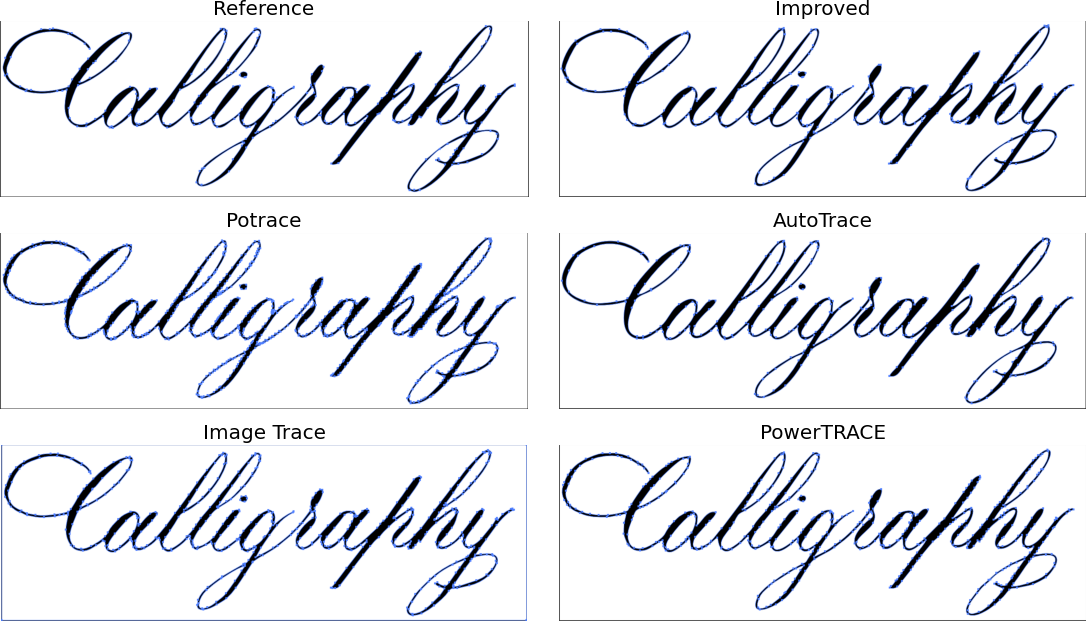

In [3]:
# Make collage

import scipy.ndimage
from skimage.io import imread
import os
import matplotlib.pyplot as plt

folder = 'C:/Users/marti/OneDrive - FH JOANNEUM/5. Semester/BAC-2/Versionen/99_Develop/BAC-2/res/calligraphy_svgs/dots'
titles = [
    'Reference',
    'Improved',
    'Potrace',
    'AutoTrace',
    'Image Trace',
    'PowerTRACE'
]

fig, axs = plt.subplots(3, 2, )
plt.subplots_adjust(hspace=0.2, wspace=-0.55)

for i, filename in enumerate(os.listdir(folder)):
    row = 0 if i < 2 else 1 if i < 4 else 2
    image = imread(f'{folder}/{filename}')
    axs[row, i%2].imshow(image)
    axs[row, i%2].set_title(titles[i], fontsize=20)

plt.savefig(f'{folder}/collage.png', dpi=600)

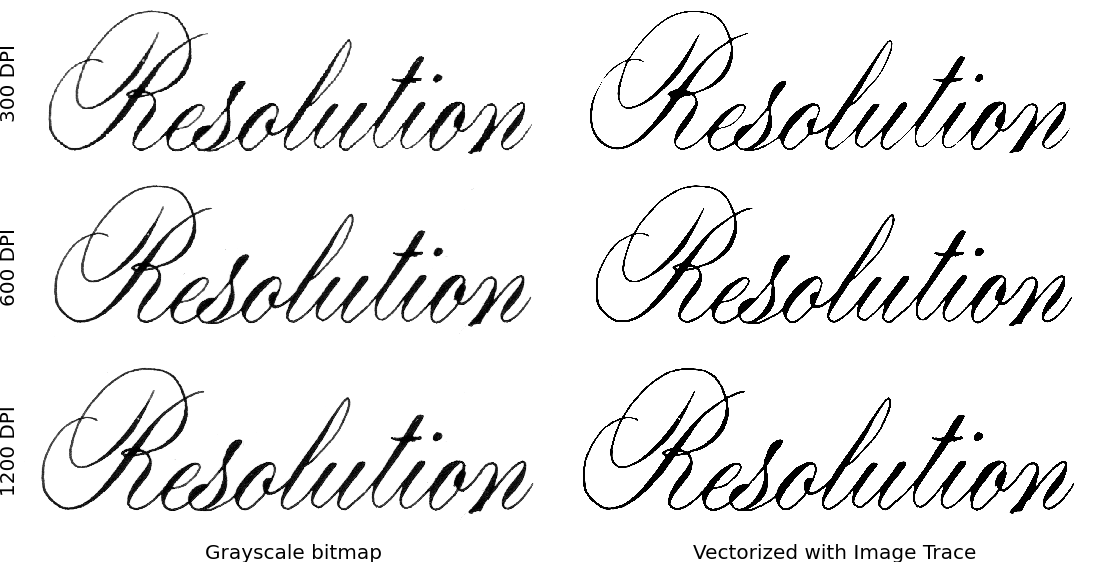

In [36]:
# Make collage

import scipy.ndimage
from skimage.io import imread
import os
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

folder = 'comparison'
files = [
    'r_300dpi.png',
    'r_300dpi_svg.png',
    'r_600dpi.png',
    'r_600dpi_svg.png',
    'r_1200dpi.png',
    'r_1200dpi_svg.png'
]

fig, axs = plt.subplots(3, 2, figsize=(15.04, 7.65))
#plt.subplots_adjust(hspace=0.2, wspace=-0.55)

for i, filename in enumerate(files):
    row = 0 if i < 2 else 1 if i < 4 else 2
    image = imread(f'{folder}/{filename}')
    axs[row, i%2].imshow(image, interpolation='none')

plt.setp(axs[-1,0], xlabel='Grayscale bitmap')
plt.setp(axs[-1,1], xlabel='Vectorized with Image Trace')
plt.setp(axs[0,0], ylabel='300 DPI')
plt.setp(axs[1,0], ylabel='600 DPI')
plt.setp(axs[2,0], ylabel='1200 DPI')

#plt.savefig(f'{folder}/resolution_collage.png', dpi=600)
plt.savefig(f'{folder}/resolution_collage.svg')